## Data Preprocessing

### Import Libraries


In [11]:
# Import Libraries

import matplotlib.dates as dates
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col = 0)
real_estate = pd.read_csv('data/Ames_Real_Estate_Data.csv', index_col = 0)

/Users/danielchoy/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
housing.shape

(2580, 81)

In [5]:
real_estate.shape

(22213, 90)

In [ ]:
housing.columns

In [ ]:
real_estate.columns

In [ ]:
housing.describe()

### Dealing with Missing Data


Text(0.5, 1, 'Real Estate Dataframe NA Values')

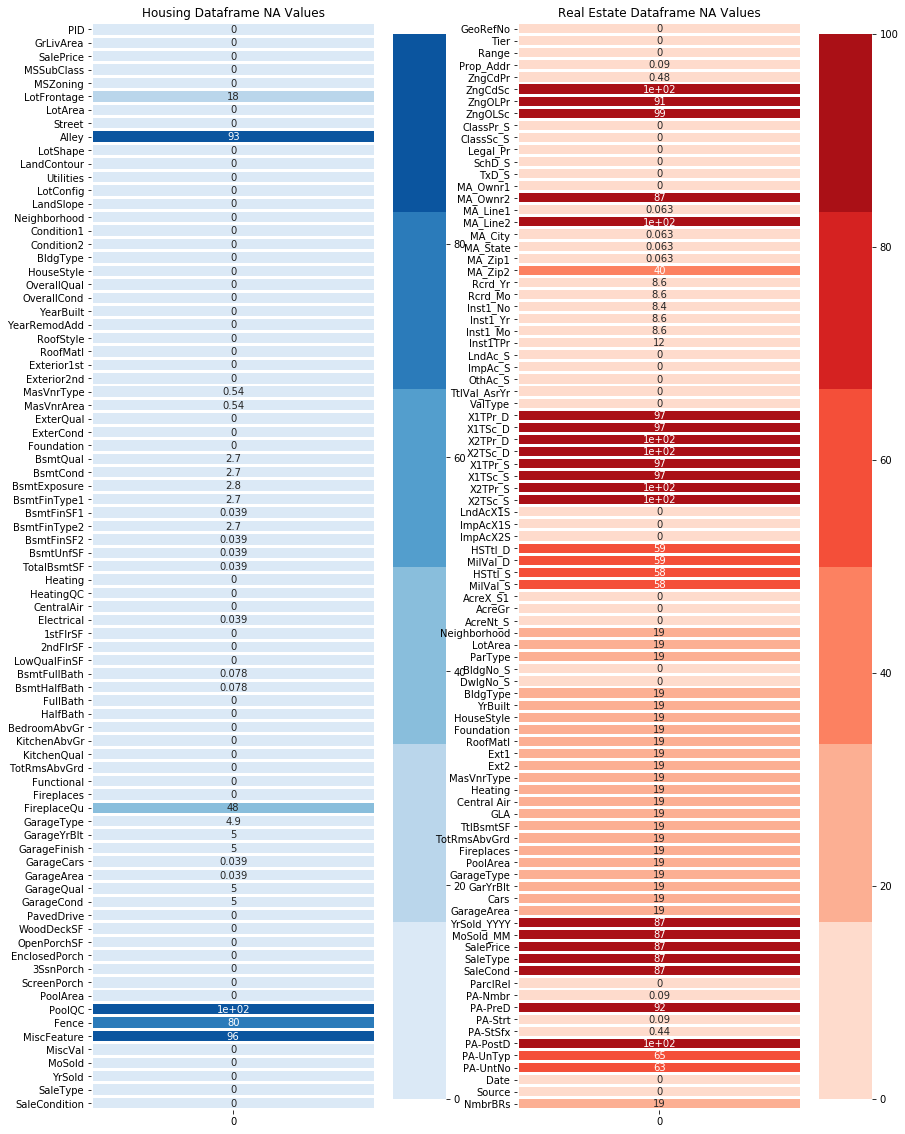

In [15]:
from IPython.display import display, HTML

cm = sns.light_palette("green",as_cmap=True)
plt.figure(figsize=(14,20))

# Housing Dataframe
plt.subplot(1,2,1)
sns.heatmap(pd.DataFrame(housing.isnull().sum()/housing.shape[0]*100),annot=True,cmap=sns.color_palette("Blues"),
           linewidth=2,linecolor="white")
plt.title("Housing Dataframe NA Values")

# Real Estate Dataframe
plt.subplot(1,2,2)
sns.heatmap(pd.DataFrame(real_estate.isnull().sum()/real_estate.shape[0]*100),annot=True,cmap=sns.color_palette("Reds"),
           linewidth=2,linecolor="white")
plt.title("Real Estate Dataframe NA Values")


In [6]:
# Remove NA values in MasVnrArea and TotalBsmtSF
housing.dropna(subset=['MasVnrArea', 'TotalBsmtSF'])

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,...,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
761,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
762,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


### Mutating Columns

In [ ]:
housing['MasVnrArea2'] = np.where(housing['MasVnrArea']== 0, 0, 1)

In [ ]:
housing['GarageArea2'] = housing['GarageArea'].fillna(0)